In [8]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
df = spark.read.parquet(bucket_dir + 'VM2Uniform--WY--2021-01-13')


In [7]:
from pyspark.sql.functions import isnull, isnan, when, count

# PSTAT 135 Group Project
# Quality of School District and Voting Outcomes

#### Group 19: Adam Alcala, Yixuan Li, Lex Navarra, Richard Zhao

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

##### Is there a connection between the quality of school district and voter turnout?

For our PSTAT 135 Final Project, we want to explore the connection education level and voter turnout for states across the nation. We feel that this will be an interesting connection because of the known influence that education can make on if a person decides to vote or not, and how they decide to vote if so. For the rest of our project, we will aim to observe the relationship not only between education level and voter turnout, but to see if these also have any significant relationships with region, political party, income, and more.

For our initial exploration, we conducted our EDA by just examining the data for one state: Wyoming.

In [7]:
# df.printSchema()

In [9]:
df.count()

290408

In [10]:
df.select(['County']).distinct().show()

+-----------+
|     County|
+-----------+
|    JOHNSON|
|    FREMONT|
|      CROOK|
|   CAMPBELL|
|     GOSHEN|
|   CONVERSE|
|   SUBLETTE|
|     PLATTE|
| SWEETWATER|
|     WESTON|
|   WASHAKIE|
|HOT SPRINGS|
|     CARBON|
|   BIG HORN|
|    LARAMIE|
|   NIOBRARA|
|       PARK|
|   SHERIDAN|
|    NATRONA|
|    LINCOLN|
+-----------+
only showing top 20 rows



In [5]:
df.select(['County']).distinct().count()

23

There are 23 counties in total for Wyoming. This can be a column we can use to compare education level across the state. Lets see if there is a lot of missing data.

,County
0,False
1,False
2,False
3,False
4,False
...,...
290403,False
290404,False
290405,False
290406,False


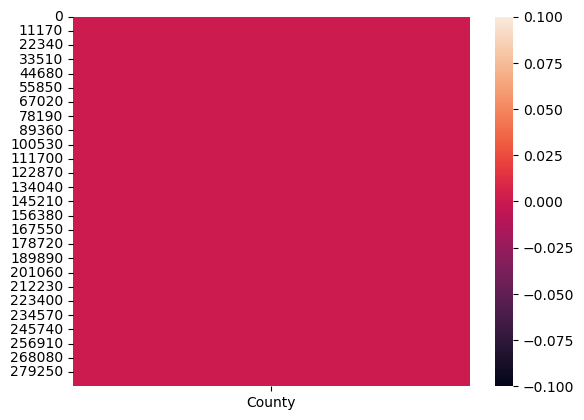

In [15]:
sample_df = df.select('County')
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)
pandas_df.isnull()

The heat map has no apparent missing values. Let's see what we have in the education column.

In [16]:
df.select(['CommercialData_Education']).distinct().show()

+------------------------+
|CommercialData_Education|
+------------------------+
|    Grad Degree - Ext...|
|    Grad Degree - Likely|
|    Bach Degree - Ext...|
|     HS Diploma - Likely|
|                    null|
|    Less than HS Dipl...|
|    Some College - Li...|
|    Vocational Techni...|
|    Some College -Ext...|
|    HS Diploma - Extr...|
|    Bach Degree - Likely|
|    Less than HS Dipl...|
+------------------------+



There are different levels of the same education level, some with 'Likely' and others with 'extremely likely' as differences. In order to not complicate the data, it would be good to group these together for later.

In [3]:
df.select(['CommercialData_Education']).distinct().count()

12

<AxesSubplot:>

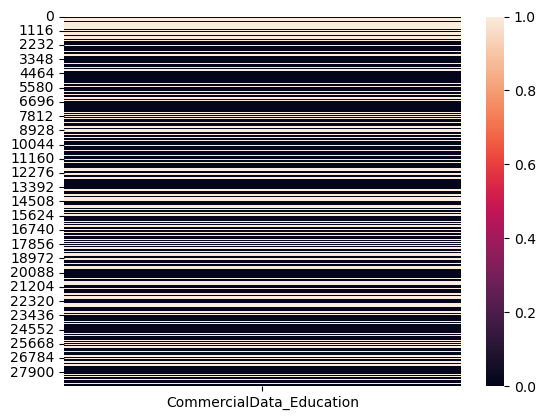

In [17]:
sample_df = df.select('CommercialData_Education').sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)

There is a good chunk of missing data throughout the column. We will have to find a way to deal with the missing data later. Cutting it out would be the easiest, and we are still left with a lot of data. We wanted to use this data in order to check education levels, but perhaps there is a another way with different columns?

Right now, our project is only at the preliminary stage. If we were to use this data, it wouldn't be the most effective at representing the true quality of school districts. The biggest issues currently are to find a better way to represent school district quality, as well as a way to correlate that by county voter turnout. The columns in the data did not seem to be very clear at seperating county turnout with specific voters, so more data exploration is required. However, this was a significant step in finding out how to answer our question, and can even lead us into figuring out more specific relations or examinations.

When beginning further EDA for this assignment, here's how the general idea will go:
1. Load in the dataset for a state
2. Get the data for education level
3. Find out the voter turnout data for a specific election (or multiple)
4. Explore the data using various columns, with education level and voter turnout as the main focus.